In [1]:
import tensorflow as tf
import keras
tf.__version__
keras.__version__

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})




from tensorflow.keras.layers import Activation, Conv2D, Input
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

2025-11-07 14:49:50.995211: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-07 14:49:51.017735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-07 14:49:51.017748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-07 14:49:51.018579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-07 14:49:51.022796: I tensorflow/core/platform/cpu_feature_guar

In [2]:

from receptivefield.image import get_default_image
from receptivefield.keras import KerasReceptiveField

from receptivefield.types import GridPoint
from receptivefield.common import estimate_rf_from_gradient

# define model function
def model_build_func(input_shape):
    act = 'linear' # see Remarks
    inp = Input(shape=input_shape, name='input_image')
    print("INP", inp)
    x = Conv2D(32, (3, 3), activation=act, padding='SAME')(inp)
    x = Conv2D(32, (3, 3), activation=act, padding='SAME')(x)
    x = Conv2D(32, (3, 3), activation=act, padding='SAME')(x)
    x = Conv2D(32, (3, 3), activation=act, padding='SAME')(x)
    x = Conv2D(32, (3, 3), activation=act, padding='SAME')(x)
    x = Conv2D(32, (3, 3), name='feature_grid', activation=act, padding='SAME')(x)

    x = AvgPool2D(2)(x)
    x = Conv2D(64, (5, 5), activation=act)(x)
    x = AvgPool2D(2)(x)
    model = Model(inp, x)
    return model

shape = [64, 64, 3]
# compute receptive field
rf = KerasReceptiveField(model_build_func)
rf_params = rf.compute(shape, 'input_image', ['feature_grid'])

'''# debug receptive field
rf.plot_rf_grids(get_default_image(shape, name='doge'), figsize=(10, 10))
print(rf_params)'''



INP KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='input_image'), name='input_image', description="created by layer 'input_image'")


2025-11-07 14:49:52.045883: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-07 14:49:52.089633: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-07 14:49:52.090941: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=64, h=64, c=1)
INPIT SHAPE: GridShape(n=1, w=64, h=64, c=3)
FM MODEL OUTPUTS: (1, 64, 64, 32)


[2025-11-07 14:49:52,645][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(0.5, 0.5), stride=(1.0, 1.0), size=Size(w=13, h=13))


NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=64, h=64, c=1)
INPIT SHAPE: GridShape(n=1, w=64, h=64, c=3)
FM MODEL OUTPUTS: (1, 64, 64, 32)
NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=64, h=64, c=1)
INPIT SHAPE: GridShape(n=1, w=64, h=64, c=3)
FM MODEL OUTPUTS: (1, 64, 64, 32)


"# debug receptive field\nrf.plot_rf_grids(get_default_image(shape, name='doge'), figsize=(10, 10))\nprint(rf_params)"

In [3]:


model = model_build_func(input_shape=(96, 96, 3))
#model.summary()

model.get_layer('input_image')

INP KerasTensor(type_spec=TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='input_image'), name='input_image', description="created by layer 'input_image'")


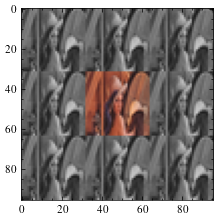

In [4]:

from receptivefield.image import get_default_image
import matplotlib.pyplot as plt
# Load sample image of `Lena`.
image = get_default_image(shape=(32, 32), tile_factor=1)
plt.imshow(image) 



In [14]:
from receptivefield.keras import KerasReceptiveField

rf = KerasReceptiveField(model_build_func, init_weights=False)

rf_params = rf.compute(
    input_shape=image.shape, 
    input_layer='input_image', 
    output_layers=['feature_grid']
)
print(rf_params)

[2025-11-07 14:50:42,600][ INFO][keras.py]::Feature maps shape: [[None, 96, 96, 1]]
[2025-11-07 14:50:42,601][ INFO][keras.py]::Input shape       : (None, 96, 96, 3)
[2025-11-07 14:50:42,623][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(0.5, 0.5), stride=(1.0, 1.0), size=Size(w=13, h=13))


INP KerasTensor(type_spec=TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='input_image'), name='input_image', description="created by layer 'input_image'")
NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=96, h=96, c=1)
INPIT SHAPE: GridShape(n=1, w=96, h=96, c=3)
FM MODEL OUTPUTS: (1, 96, 96, 32)
NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=96, h=96, c=1)
INPIT SHAPE: GridShape(n=1, w=96, h=96, c=3)
FM MODEL OUTPUTS: (1, 96, 96, 32)
NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=96, h=96, c=1)
INPIT SHAPE: GridShape(n=1, w=96, h=96, c=3)
FM MODEL OUTPUTS: (1, 96, 96, 32)
[FeatureMapDescription(size=Size(w=96, h=96), rf=ReceptiveFieldDescription(offset=(0.5, 0.5), stride=(1.0, 1.0), size=Size(w=13, h=13)))]


In [6]:
rf.num_feature_maps

1

In [13]:
rf.num_feature_maps

1

NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=96, h=96, c=1)
INPIT SHAPE: GridShape(n=1, w=96, h=96, c=3)
FM MODEL OUTPUTS: (1, 96, 96, 32)
NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=96, h=96, c=1)
INPIT SHAPE: GridShape(n=1, w=96, h=96, c=3)
FM MODEL OUTPUTS: (1, 96, 96, 32)
-1.7918238e-06
(1, 96, 96, 3)


(35.0, 61.0)

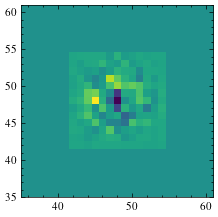

In [7]:

def get_grad_erf(rf, fm_id, point):
        points = [GridPoint(0, 0)] * rf.num_feature_maps
        points[fm_id] = GridPoint(*point)

        receptive_field_grad = np.zeros_like(rf._get_gradient_from_grid_points(points=points)[fm_id])
        for _ in range(1):
                receptive_field_grad += rf._get_gradient_from_grid_points(points=points)[fm_id]
        #plt.imshow(receptive_field_grad[0])
        receptive_field = estimate_rf_from_gradient(receptive_field_grad)
        print(np.sum(receptive_field_grad))
        print(receptive_field_grad.shape)

        receptive_field_grad = np.array(receptive_field_grad).mean(0).mean(-1)
        receptive_field_grad /= receptive_field_grad.max()
        receptive_field_grad += (np.abs(receptive_field_grad) > 0) * 0.2
        plt.imshow(receptive_field_grad)

        return receptive_field_grad
#get_grad_erf(rf, fm_id=0, point=(rf_params[0].size[0]//2, rf_params[0].size[1]//2))

plt.imshow(get_grad_erf(rf, fm_id=0, point=(rf_params[0].size[0]//2, rf_params[0].size[1]//2)))
ax = plt.gca()

mid_x, mid_y = rf_params[0].size[0]//2, rf_params[0].size[1]//2
extent_x, extent_y = rf_params[0].rf.size[0], rf_params[0].rf.size[1]
ax.set_xlim([mid_x-extent_x, mid_x+extent_x])
ax.set_ylim([mid_y-extent_y, mid_y+extent_y])

In [8]:
rf_params

[FeatureMapDescription(size=Size(w=96, h=96), rf=ReceptiveFieldDescription(offset=(0.5, 0.5), stride=(1.0, 1.0), size=Size(w=13, h=13)))]

In [9]:
mid_x, mid_y

(48, 48)

NUM FEATURE MAPS: 1
OUTPUT SHAPE: GridShape(n=1, w=96, h=96, c=1)
INPIT SHAPE: GridShape(n=1, w=96, h=96, c=3)
FM MODEL OUTPUTS: (1, 96, 96, 32)


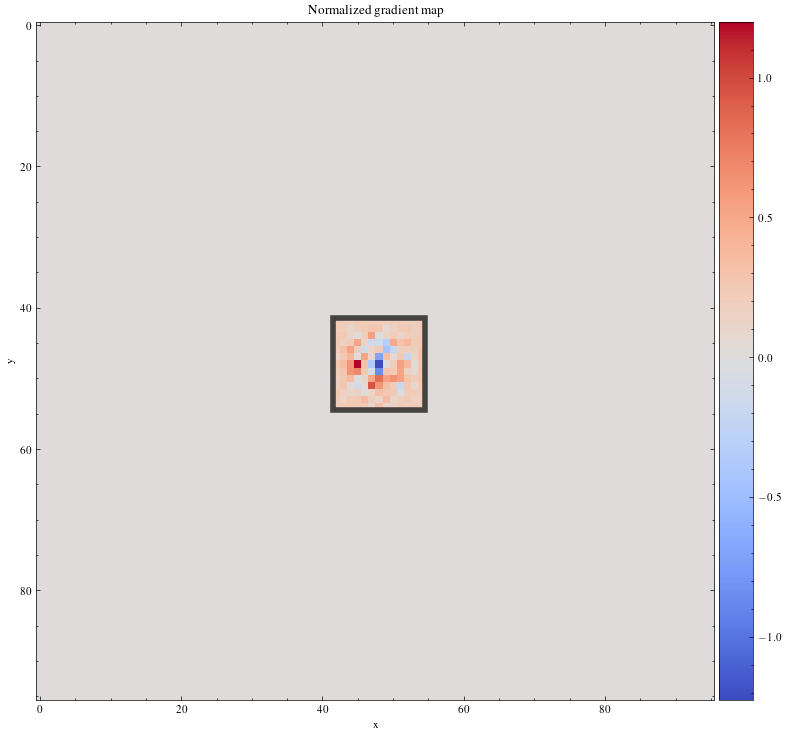

In [10]:
plt.figure(figsize=(8, 8))
rf.plot_gradient_at(fm_id=0, point=(rf_params[0].size[0]//2, rf_params[0].size[1]//2), image=None, figsize=rf_params[0].rf.size, axis=plt.gca())


In [11]:
rf.num_feature_maps

1

In [12]:
image.shape

(96, 96, 3)